In [1]:
#import Dataset
import pandas as pd
import string
import re
review = pd.read_csv("train_data_20000.csv")

In [2]:
review

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative
...,...,...,...
20813,so I 'm not sure if I was unlucky or the soles...,1.0,Negative
20814,If you can live with a split sole they are ext...,1.0,Positive
20815,perfect height in the ankle,1.0,Positive
20816,They pinched my feet so bad as to cause pain t...,1.0,Negative


In [3]:
review['Review_Text'].isnull().sum()

0

In [4]:
review['Review_Rating'].unique()

array([ 2., nan,  3.,  4.,  5.,  1.])

In [5]:
import seaborn as sns

In [6]:
review['Sentiment Class'].isnull().sum()

0

In [7]:
review.drop_duplicates(subset='Review_Text',inplace=True)

In [8]:
review.index=range(0,18490)

In [9]:
review

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative
...,...,...,...
18485,so I 'm not sure if I was unlucky or the soles...,1.0,Negative
18486,If you can live with a split sole they are ext...,1.0,Positive
18487,perfect height in the ankle,1.0,Positive
18488,They pinched my feet so bad as to cause pain t...,1.0,Negative


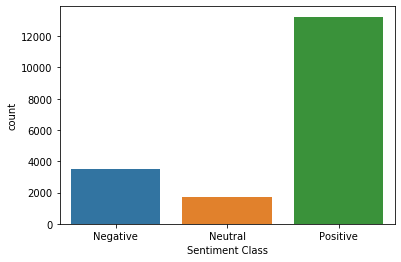

In [10]:
sns.countplot(review['Sentiment Class'])

In [11]:
with open('stopwords.txt','r') as fname:
    stopwords=fname.read()

In [12]:
stopwords=stopwords.split('\n')

In [13]:
def normalize(col):
    for i in range(len(col)):
        lm=col[i].lower().split(' ')
    return lm


def stopwords_removal(stopwords,review_split):
    stop_wrods_remove=[]
    for i in range(len(review_split)):
        stop_wrods_remove.append([i for i in review_split[i] if i not in stopwords])
    return stop_wrods_remove


def number_removed(stopword_rem):
    joined=[]
    for i in range(len(stopword_rem)):
        joined.append(' '.join(stopword_rem[i]))
    number_removed=[]
    for i in range(len(joined)):
        number_removed.append(re.sub(r'[0-9]+',r'',joined[i]))
    removed=[]
    for i in range(len(number_removed)):
        removed.append(re.sub(r'  ',r' ',number_removed[i]))
    punct=[]
    for i in range(len(removed)):
        punct.append([i for i in removed[i] if i not in [i for i in string.punctuation]])
    jo=[]
    for i in range(len(punct)):
        jo.append(''.join(punct[i]))
    return jo

In [14]:
review_split=review[['Review_Text']].apply(normalize,axis=1)

In [15]:
stopword_rem=stopwords_removal(stopwords,review_split)

In [16]:
removed_number=number_removed(stopword_rem)

In [17]:
feature_extraction=[]
for i in range(len(removed_number)):
    feature_extraction.append(removed_number[i].split())

In [18]:
df={'feature_extraction':feature_extraction,'review_rating':review['Review_Rating'],'Sentiment':review['Sentiment Class']}
review_analysis=pd.DataFrame(df)

In [19]:
review_analysis

,feature_extraction,review_rating,Sentiment
0,"[gt, shoes, not, fit, gt]",2.0,Negative
1,"[hit, miss, shoes, arch, support, concerned]",2.0,Negative
2,"[pinky, toes, blisters, minute, run, socks]",2.0,Negative
3,"[not, buying]",2.0,Negative
4,"[m, sending, it, looks, balance, changed, size...",2.0,Negative
...,...,...,...
18485,"[m, not, unlucky, soles, poorly, manufactured]",1.0,Negative
18486,"[live, split, sole, extremely, comfortable, sh...",1.0,Positive
18487,"[perfect, height, ankle]",1.0,Positive
18488,"[pinched, feet, bad, cause, pain, degree, not,...",1.0,Negative


In [20]:
new=[]
for i in range(len(removed_number)):
    new.append(removed_number[i].split(','))

In [21]:
review['text_mining']=new

In [22]:
import spacy 

In [23]:
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\Users\anilkrishna\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [24]:
spcy=[]
for i in range(len(new)):
    b=nlp(new[i][0])
    spcy.append([token.text for token in b if token.pos_ == "VERB" or token.pos_ == "ADV" or token.pos_ == "PART" or token.pos_ == "INTJ"])

In [25]:
noun=[]
for i in range(len(new)):
    b=nlp(new[i][0])
    noun.append([token.text for token in b if token.pos_ == "NOUN"])

In [26]:
adj=[]
for i in range(len(new)):
    b=nlp(new[i][0])
    adj.append([token.text for token in b if token.pos_ == "ADJ"])

In [27]:
review

,Review_Text,Review_Rating,Sentiment Class,text_mining
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative,[gt shoes not fit gt ]
1,Seems it is now hit or miss with these shoes a...,2.0,Negative,[hit miss shoes arch support concerned ]
2,My pinky toes have blisters from just a 30-min...,2.0,Negative,[pinky toes blisters minute run socks ]
3,I will not be buying these again .,2.0,Negative,[not buying ]
4,I 'm sending these back .It looks like new bal...,2.0,Negative,[m sending it looks balance changed size shoes ]
...,...,...,...,...
18485,so I 'm not sure if I was unlucky or the soles...,1.0,Negative,[m not unlucky soles poorly manufactured ]
18486,If you can live with a split sole they are ext...,1.0,Positive,[live split sole extremely comfortable shoes ]
18487,perfect height in the ankle,1.0,Positive,[perfect height ankle]
18488,They pinched my feet so bad as to cause pain t...,1.0,Negative,[pinched feet bad cause pain degree not explain ]


In [28]:
review['Adjective']=adj

In [29]:
review['Verb']=spcy

In [30]:
review['Noun']=noun

In [31]:
ad=review[['Review_Text','Sentiment Class','Adjective','Verb','Noun',]]

In [32]:
ad['lam_stem']=ne

NameError: name 'ne' is not defined

In [35]:
noun_wc=[]
for i in range(len(noun)):
    for j in range(len(noun[i])):
        noun_wc.append(noun[i][j])

In [36]:
adj_wc=[]
for i in range(len(adj)):
    for j in range(len(adj[i])):
        adj_wc.append(adj[i][j])

In [37]:
noun_count=dict()
noun_set=set(noun_wc)
for i in noun_set:
    noun_count[i]=noun_wc.count(i)
sorted_noun=sorted(noun_count.items(),key= lambda i:i[1], reverse=True)

In [38]:
sorted_noun

[('shoes', 3792),
 ('shoe', 1962),
 ('size', 1917),
 ('pair', 831),
 ('feet', 811),
 ('fit', 719),
 ('price', 613),
 ('support', 552),
 ('love', 509),
 ('asics', 388),
 ('time', 383),
 ('day', 371),
 ('balance', 367),
 ('color', 365),
 ('running', 354),
 ('quality', 353),
 ('foot', 350),
 ('sneakers', 275),
 ('bit', 265),
 ('weight', 260),
 ('comfort', 201),
 ('wear', 196),
 ('light', 182),
 ('colors', 173),
 ('toe', 167),
 ('lot', 154),
 ('miles', 152),
 ('trail', 150),
 ('half', 149),
 ('cushion', 145),
 ('product', 143),
 ('heel', 140),
 ('style', 137),
 ('width', 136),
 ('purchase', 125),
 ('months', 123),
 ('box', 120),
 ('run', 119),
 ('brand', 115),
 ('pain', 113),
 ('model', 112),
 ('toes', 111),
 ('laces', 110),
 ('reviews', 107),
 ('look', 105),
 ('cushioning', 102),
 ('fits', 102),
 ('week', 100),
 ('days', 97),
 ('pairs', 96),
 ('design', 95),
 ('ones', 91),
 ('delivery', 91),
 ('traction', 91),
 ('runs', 85),
 ('soles', 84),
 ('hours', 83),
 ('socks', 83),
 ('perfect', 79)

In [39]:
noun_wc_str=' '.join(noun_wc)

In [40]:
adj_wc_str=' '.join(adj_wc)

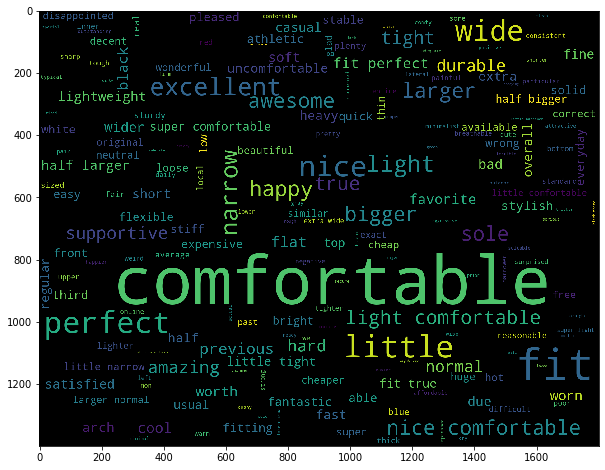

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,8))
wordcloud_noun = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(adj_wc_str)

plt.imshow(wordcloud_noun)

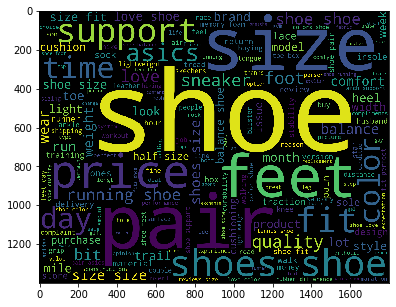

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(10,5))
wordcloud_noun = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(noun_wc_str)

plt.imshow(wordcloud_noun)

In [43]:
abc=[]
for i in range(len(review)):
    if review['Verb'][i]==[]:
        abc.append(review['Noun'][i] + review['Adjective'][i])
    elif review['Adjective'][i]==[]:
        abc.append(review['Noun'][i] + review['Verb'][i])
    else:
        abc.append(review['Verb'][i] + review['Adjective'][i])

In [44]:
word_set=[]
for i in range(len(review)):
    word_set.append( review['Adjective'][i]+ review['Verb'][i])

In [45]:
# abc=[]
# for i in range(len(review)):
#    abc.append(review['Verb'][i] + review['Adjective'][i])

In [46]:
review['text_mining']=abc

In [47]:
review['word_set']=word_set

In [48]:
review

,Review_Text,Review_Rating,Sentiment Class,text_mining,Adjective,Verb,Noun,word_set
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative,"[shoes, not, fit]",[],"[not, fit]",[shoes],"[not, fit]"
1,Seems it is now hit or miss with these shoes a...,2.0,Negative,"[hit, concerned]",[concerned],[hit],"[shoes, support]","[concerned, hit]"
2,My pinky toes have blisters from just a 30-min...,2.0,Negative,"[blisters, minute, socks, run]",[],[run],"[blisters, minute, socks]",[run]
3,I will not be buying these again .,2.0,Negative,"[not, buying]",[],"[not, buying]",[],"[not, buying]"
4,I 'm sending these back .It looks like new bal...,2.0,Negative,"[balance, size, shoes, sending, looks, changed]",[],"[sending, looks, changed]","[balance, size, shoes]","[sending, looks, changed]"
...,...,...,...,...,...,...,...,...
18485,so I 'm not sure if I was unlucky or the soles...,1.0,Negative,"[not, poorly, manufactured, unlucky]",[unlucky],"[not, poorly, manufactured]",[soles],"[unlucky, not, poorly, manufactured]"
18486,If you can live with a split sole they are ext...,1.0,Positive,"[split, extremely, live, sole, comfortable]","[live, sole, comfortable]","[split, extremely]",[shoes],"[live, sole, comfortable, split, extremely]"
18487,perfect height in the ankle,1.0,Positive,"[height, ankle, perfect]",[],[perfect],"[height, ankle]",[perfect]
18488,They pinched my feet so bad as to cause pain t...,1.0,Negative,"[pinched, not, explain, bad]",[bad],"[pinched, not, explain]","[feet, pain, degree]","[bad, pinched, not, explain]"


In [49]:
with open('negative.txt','r') as fname:
    negative_word=fname.read()
negative_word=negative_word.split('\n')

In [50]:
negative_word

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'not',
 'nt',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive

In [51]:
neutral_set=review.loc[review['Sentiment Class']=='Neutral','word_set']
dbc=[]
for i in range(len(neutral_set)):
    dbc.append([i for i in neutral_set.iloc[i] if i not in negative_word])
neutral_series=pd.Series(i for i in dbc)
neutral_series=[i for i in neutral_series if i]
fname1=pd.DataFrame({'final_text':neutral_series})
fname1['POS_tag']='Neutral'

In [52]:
neutral_set=review.loc[review['Sentiment Class']=='Neutral','word_set']
fname1=pd.DataFrame({'final_text':neutral_set})
fname1['POS_tag']='Neutral'

In [53]:
negative_set=review.loc[review['Sentiment Class']=='Negative','word_set']
fname2=pd.DataFrame({'final_text':negative_set})
fname2['POS_tag']='Negative'

In [54]:
positive_set=review.loc[review['Sentiment Class']=='Positive','word_set']

with open('positive_words.txt','r') as fname:
    positive_word=fname.read()
positive_word=positive_word.split('\n')

dbc=[]
for i in range(len(positive_set)):
    dbc.append([i for i in positive_set.iloc[i] if i in positive_word])
positive_series=pd.Series(i for i in dbc)

ab=[i for i in dbc if i !=[]]



# positive_set=review.loc[review['Sentiment Class']=='Positive','word_set']
fname3=pd.DataFrame({'final_text':ab})
fname3['POS_tag']='Positive'

In [55]:
fname1=fname1.append(fname2)
fname1=fname1.append(fname3)

In [56]:
fname1

,final_text,POS_tag
5,"[not, actually, not]",Neutral
10,"[normal, actually]",Neutral
24,[],Neutral
40,"[getting, shadow]",Neutral
62,"[s, not]",Neutral
...,...,...
6999,[durable],Positive
7000,[correct],Positive
7001,[promised],Positive
7002,[comfortable],Positive


In [57]:
fname1.index=range(0,12251)

In [58]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [59]:
#lemmantization
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()
def lemmatSentence(sentence):
    token_words=sentence #word_tokenize(sentence)
    lemmat_token=[]
    for word in token_words:
        lemmat_token.append(lemmatizer.lemmatize(word))
        lemmat_token.append(" ")
    return "".join(lemmat_token)


from nltk.stem import PorterStemmer
ps = PorterStemmer()
def StemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_token=[]
    for word in token_words:
        stem_token.append(ps.stem(word))
        stem_token.append(" ")
    return "".join(stem_token)

abc=[]
for i in range(len(fname1['final_text'])):
    abc.append(' '.join(fname1['final_text'][i]))
new=[]
for i in range(len(fname1['final_text'])):
    new.append(lemmatSentence(fname1['final_text'][i]))


In [60]:
cd=[]
for i in range(len(new)):
    cd.append(''.join(new[i]))
de=[]
for i in range(len(cd)):
    de.append(StemSentence(cd[i]))

In [61]:
ne=[]
for i in range(len(de)):
    ne.append(de[i].split())

In [62]:
fname1
fname1['lam_stem']=ne

In [63]:
fname1

,final_text,POS_tag,lam_stem
0,"[not, actually, not]",Neutral,"[not, actual, not]"
1,"[normal, actually]",Neutral,"[normal, actual]"
2,[],Neutral,[]
3,"[getting, shadow]",Neutral,"[get, shadow]"
4,"[s, not]",Neutral,"[s, not]"
...,...,...,...
12246,[durable],Positive,[durabl]
12247,[correct],Positive,[correct]
12248,[promised],Positive,[promis]
12249,[comfortable],Positive,[comfort]


In [64]:
import gensim
from gensim.utils import simple_preprocess

In [65]:
neutral_lda=fname1.loc[fname1['POS_tag']=='Neutral','final_text']
positive_lda=fname1.loc[fname1['POS_tag']=='Positive','final_text']
negative_lda=fname1.loc[fname1['POS_tag']=='Negative','final_text']

In [66]:
neutral_lda

0                       [not, actually, not]
1                         [normal, actually]
2                                         []
3                          [getting, shadow]
4                                   [s, not]
                        ...                 
1720             [online, purchased, buying]
1721                                   [run]
1722    [larger, normal, short, top, bought]
1723                                [bought]
1724               [bigger, replace, mesame]
Name: final_text, Length: 1725, dtype: object

In [67]:
dictionary = gensim.corpora.Dictionary(fname1['final_text'])
count = 0
for k, v in dictionary.iteritems():
    count += 1
    if count > 500:
        break
dictionary.filter_extremes()
bow_corpus = [dictionary.doc2bow(doc) for doc in fname1['final_text']]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes=100,workers=4,
                        )
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.204*"perfectly" + 0.085*"cool" + 0.056*"stylish" + 0.046*"easy" + 0.035*"stable"'), (1, '0.306*"not" + 0.130*"love" + 0.070*"fast" + 0.063*"bought" + 0.059*"running"'), (2, '0.151*"nt" + 0.140*"happy" + 0.139*"awesome" + 0.090*"amazing" + 0.027*"wonderful"'), (3, '0.238*"super" + 0.112*"s" + 0.077*"soft" + 0.074*"satisfied" + 0.040*"sturdy"'), (4, '0.113*"narrow" + 0.070*"pleased" + 0.046*"top" + 0.044*"sole" + 0.036*"tried"'), (5, '0.914*"comfortable" + 0.044*"loves" + 0.013*"supportive" + 0.004*"affordable" + 0.004*"incredibly"'), (6, '0.090*"little" + 0.077*"fit" + 0.066*"wear" + 0.057*"larger" + 0.051*"tight"'), (7, '0.335*"perfect" + 0.153*"excellent" + 0.063*"fine" + 0.057*"supportive" + 0.047*"favorite"'), (8, '0.275*"recommend" + 0.157*"pretty" + 0.109*"loved" + 0.059*"recommended" + 0.055*"buy"'), (9, '0.466*"nice" + 0.090*"durable" + 0.038*"solid" + 0.036*"wore" + 0.023*"uncomfortable"')]


In [68]:
dictionary = gensim.corpora.Dictionary(neutral_lda)
count = 0
for k, v in dictionary.iteritems():
    count += 1
    if count > 500:
        break
dictionary.filter_extremes()
bow_corpus = [dictionary.doc2bow(doc) for doc in neutral_lda]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes=100,workers=4,
                        )
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.341*"bought" + 0.222*"bigger" + 0.107*"fits" + 0.053*"previous" + 0.032*"wears"'), (1, '0.255*"running" + 0.083*"walking" + 0.064*"try" + 0.063*"feel" + 0.060*"actually"'), (2, '0.257*"little" + 0.192*"wide" + 0.085*"worn" + 0.055*"fit" + 0.049*"extra"'), (3, '0.484*"not" + 0.074*"purchased" + 0.046*"comfortable" + 0.044*"wore" + 0.044*"wish"'), (4, '0.124*"expected" + 0.103*"little" + 0.091*"sole" + 0.086*"hard" + 0.058*"nice"'), (5, '0.156*"fit" + 0.150*"narrow" + 0.132*"run" + 0.072*"tried" + 0.047*"slightly"'), (6, '0.135*"looking" + 0.103*"runs" + 0.098*"tight" + 0.087*"black" + 0.071*"somewhat"'), (7, '0.399*"wear" + 0.141*"normally" + 0.106*"wearing" + 0.104*"usually" + 0.036*"able"'), (8, '0.285*"larger" + 0.186*"half" + 0.111*"buy" + 0.086*"normal" + 0.071*"comfortable"'), (9, '0.429*"nt" + 0.158*"s" + 0.053*"wider" + 0.043*"looks" + 0.038*"getting"')]


In [69]:
dictionary = gensim.corpora.Dictionary(positive_lda)
count = 0
for k, v in dictionary.iteritems():
    count += 1
    if count > 500:
        break
dictionary.filter_extremes()
bow_corpus = [dictionary.doc2bow(doc) for doc in positive_lda]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes=100,workers=4,
                        )
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.198*"cool" + 0.182*"fine" + 0.097*"easy" + 0.084*"solid" + 0.059*"sturdy"'), (1, '0.415*"excellent" + 0.160*"durable" + 0.118*"worth" + 0.058*"nicely" + 0.041*"free"'), (2, '0.322*"super" + 0.261*"comfortable" + 0.137*"favorite" + 0.056*"comfortably" + 0.053*"beautiful"'), (3, '0.310*"support" + 0.198*"soft" + 0.106*"thank" + 0.077*"glad" + 0.058*"prefer"'), (4, '0.268*"love" + 0.220*"awesome" + 0.207*"happy" + 0.168*"pretty" + 0.043*"wonderful"'), (5, '0.563*"perfectly" + 0.126*"fantastic" + 0.066*"flexible" + 0.061*"top" + 0.036*"outstanding"'), (6, '0.290*"loves" + 0.195*"supportive" + 0.163*"fast" + 0.116*"pleased" + 0.060*"stable"'), (7, '0.988*"comfortable" + 0.006*"hot" + 0.003*"amazingly" + 0.000*"nice" + 0.000*"ideal"'), (8, '0.655*"perfect" + 0.146*"amazing" + 0.077*"stylish" + 0.034*"correct" + 0.022*"strong"'), (9, '0.452*"nice" + 0.208*"recommend" + 0.095*"loved" + 0.060*"satisfied" + 0.048*"liked"')]


In [70]:
dictionary = gensim.corpora.Dictionary(negative_lda)
count = 0
for k, v in dictionary.iteritems():
    count += 1
    if count > 500:
        break
dictionary.filter_extremes()
bow_corpus = [dictionary.doc2bow(doc) for doc in negative_lda]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes=100,workers=4,
                        )
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.103*"sole" + 0.082*"left" + 0.061*"started" + 0.051*"wear" + 0.051*"normally"'), (1, '0.378*"not" + 0.046*"disappointed" + 0.044*"tried" + 0.035*"walking" + 0.031*"look"'), (2, '0.144*"not" + 0.140*"wear" + 0.131*"comfortable" + 0.118*"s" + 0.087*"bought"'), (3, '0.367*"nt" + 0.082*"wearing" + 0.075*"bigger" + 0.043*"flat" + 0.036*"received"'), (4, '0.150*"larger" + 0.071*"half" + 0.070*"normal" + 0.065*"returned" + 0.064*"fits"'), (5, '0.272*"fit" + 0.127*"not" + 0.102*"feel" + 0.088*"expected" + 0.055*"hard"'), (6, '0.198*"narrow" + 0.058*"return" + 0.057*"top" + 0.051*"apart" + 0.047*"stiff"'), (7, '0.312*"little" + 0.198*"tight" + 0.084*"buy" + 0.043*"short" + 0.040*"narrow"'), (8, '0.237*"wide" + 0.056*"runs" + 0.056*"shoe" + 0.049*"poor" + 0.049*"probably"'), (9, '0.196*"run" + 0.134*"running" + 0.085*"not" + 0.078*"nt" + 0.059*"worn"')]


In [71]:
from gensim.models import KeyedVectors
w2v_set=[]
for i in range(len(noun_wc)):
    w2v_set.append(lemmatSentence(noun_wc[i]).strip())

w2v_set=set(w2v_set)

# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True,limit=500000)

vectors = [w for w in list(w2v_set) if w in model]
          
similar_word=dict()
for i in range(len(vectors)):
    similar_word[vectors[i]]=[i for i, j in model.most_similar(vectors[i])]   

In [72]:
sm=dict()
sm['price']=[i for i, j in model.most_similar('color')] 


In [86]:
sm

{'price': ['colors',
  'Color',
  'vibrant_colors',
  'hues',
  'color_palette',
  'colored',
  'Colour',
  'bright_colors',
  'skin_tones',
  'coloration']}

In [87]:
similar_word

{'e': ['electronic',
  'Electronic',
  'E',
  'e_commerce',
  'ebooks',
  'ar',
  'online',
  'paperless',
  'e_Governance',
  'ecommerce'],
 '★': ['QUARTET',
  'AND_FRIENDS',
  'THEATER',
  'ENSEMBLE',
  'IN_CONCERT',
  'MUSIC_REVIEW',
  'MOVIES',
  'ON_STAGE',
  'THEATER_REVIEW',
  'SATURDAY_NIGHT'],
 's': ['€_™_s',
  '™_s',
  'whoâ_€_™',
  'Thatâ_€_™',
  '`_s',
  'Americaâ_€_™',
  '€_™',
  'Whatâ_€_™',
  'Letâ_€_™',
  'â_¢'],
 'k': ['IRAs',
  '###ks',
  'Roth_IRAs',
  'Defined_contribution',
  'SEP_IRA',
  'Roth_IRA',
  'Thrift_Savings_Plan',
  'Individual_Retirement_Accounts',
  'Individual_Retirement_Account',
  'nonqualified_deferred_compensation'],
 'b': ['c', 'f', 'j', 'h', 'd', 'r', '§', 'CFR_§_###.##', 'Supp.', 'g'],
 'd': ['tf', 'fr', 'b', 'h', 'f', 'p', 'maj', 'dC', 'dec', 'def'],
 'v': ['vs', 'Vs', 'Utd_v', 'Res_v', 'vs.', 'vS', 'vM', 'Bv', 'vR', 'Yth'],
 'm': ['meters',
  'ft',
  '###m',
  'meter',
  '####m_####m',
  't',
  '####m',
  '###metres',
  'mi',
  '##m']}

In [88]:
de

['not actual not ',
 'normal actual ',
 '',
 'get shadow ',
 's not ',
 'normal wear ',
 'bought balanc recent ',
 'fine fit wear ',
 'wear ',
 'littl averag walk not use intend ',
 'wider purchas ',
 'wear ',
 'previou label instead purchas ',
 'satisfi foolish tempt nt run comfort ',
 'buy wear ',
 'previou non odd fit decid pair ',
 'larger advis consid ordinarili wear ',
 'lite ',
 'purchas ',
 'regular ',
 'mark exactli ',
 'wore ',
 'nt normal arch ',
 'front howev leaf ',
 'suggest ',
 'black bought ',
 'nice look fit wore ',
 'wide ',
 'wear gym ',
 'littl sole nice sturdybut cushion ',
 'not buy ',
 'beauti design ',
 'arch half larger nt definit receiv tri ',
 '',
 'terribl nt ',
 'outdoor mayb suit run ',
 'littl finebut run ',
 's basic nt stand run ',
 'lighter similar s look ',
 'normal wear ',
 'comfort expectedgreat not ',
 'usual wear recommend ',
 'tradit stick ',
 'upper train improv significantli ',
 'half recommend upgrad ',
 'suddenli fall bought ',
 'wear ',
 'fi

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import metrics
reponse_bow = CountVectorizer()
reponse_bow.fit(de)
response_matrix=reponse_bow.transform(de)
response_matrix.shape

def classchange(val):
    if val=='Positive':
        return 1
    elif val=='Neutral':
        return 0
    else:
        return -1
    
fname1['Sentiment Class']=fname1['POS_tag'].apply(classchange)

from sklearn.model_selection import train_test_split
response_train,response_test = train_test_split(fname1,test_size=0.30)

import numpy as np
response_train.index = np.arange(0,len(response_train))
response_test.index = np.arange(0,len(response_test))

res_train=[]
for i in range(len(response_train['lam_stem'])):
    res_train.append(' '.join(response_train['lam_stem'][i]))
    
res_test=[]
for i in range(len(response_test['lam_stem'])):
    res_test.append(' '.join(response_test['lam_stem'][i]))
    
response_matrix_train=reponse_bow.transform(res_train)
print("Shape of training dataset", response_matrix_train.shape)

response_matrix_test=reponse_bow.transform(res_test)
print("Shape of testing dataset", response_matrix_test.shape)


from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(response_matrix_train,response_train['Sentiment Class'])
train_pred_m = classifier_mb.predict(response_matrix_train)
accuracy_train_m = np.mean(train_pred_m==response_train['Sentiment Class']) 

print("\ntraining data accuracy", accuracy_train_m)

print("\ntraining data classification report\n\n",metrics.classification_report(response_train['Sentiment Class'], train_pred_m, digits=3))

test_pred_m = classifier_mb.predict(response_matrix_test)
accuracy_test_m = np.mean(test_pred_m==response_test['Sentiment Class']) 

print("\ntesting data accuracy", accuracy_test_m)
print("\ntesting data classification report\n\n",metrics.classification_report(response_test['Sentiment Class'], test_pred_m, digits=3))

Shape of training dataset (8575, 1573)
Shape of testing dataset (3676, 1573)

training data accuracy 0.8663556851311953

training data classification report

               precision    recall  f1-score   support

          -1      0.793     0.836     0.814      2463
           0      0.788     0.395     0.526      1219
           1      0.911     0.999     0.953      4893

    accuracy                          0.866      8575
   macro avg      0.830     0.744     0.764      8575
weighted avg      0.859     0.866     0.852      8575


testing data accuracy 0.8280739934711643

testing data classification report

               precision    recall  f1-score   support

          -1      0.736     0.762     0.749      1059
           0      0.530     0.265     0.353       506
           1      0.904     0.996     0.948      2111

    accuracy                          0.828      3676
   macro avg      0.723     0.674     0.683      3676
weighted avg      0.804     0.828     0.809      3676


In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(response_train['Sentiment Class'],train_pred_m))

              precision    recall  f1-score   support

          -1       0.79      0.84      0.81      2463
           0       0.79      0.40      0.53      1219
           1       0.91      1.00      0.95      4893

    accuracy                           0.87      8575
   macro avg       0.83      0.74      0.76      8575
weighted avg       0.86      0.87      0.85      8575



TFIDF

In [75]:
tfidf_transformer = TfidfTransformer().fit(response_matrix)

test_tfidf = tfidf_transformer.transform(response_matrix_test)
test_tfidf.shape 

train_tfidf = tfidf_transformer.transform(response_matrix_train)
train_tfidf.shape 

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,response_train['Sentiment Class'])
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==response_train['Sentiment Class']) 

accuracy_train_m

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==response_test['Sentiment Class']) 

accuracy_test_m

pd.crosstab(train_pred_m,response_train['Sentiment Class'])

Sentiment Class,-1,0,1
row_0,,,
-1,2143,661,4
0,49,359,1
1,271,199,4888


Parameter Tuning

In [76]:
#parameter tuning

tuned_parameters = {
    'alpha': [1.5,1.4,1.3,1.2,1.1,1, 1e-1, 1e-2,1e-3,1e-4,1e-5,1e-6]}

from sklearn.model_selection import  GridSearchCV

clf = GridSearchCV(classifier_mb, tuned_parameters, cv=10)

clf.fit(response_matrix_train,response_train['Sentiment Class'])

best_parameter=clf.best_params_

print("\nBest parameter", clf.best_params_)

print("\nBest estimator",clf.best_estimator_)

# Multinomial Naive Bayes
classifier_mb = MB(alpha=best_parameter['alpha'])
classifier_mb.fit(response_matrix_train,response_train['Sentiment Class'])
train_pred_m = classifier_mb.predict(response_matrix_train)
accuracy_train_m = np.mean(train_pred_m==response_train['Sentiment Class']) 


print("\ntraining Crosstab\n\n",pd.crosstab(train_pred_m,response_train['Sentiment Class']))

print("\ntraining accuracy",accuracy_train_m)

print("\ntraining data classification report\n\n",metrics.classification_report(response_train['Sentiment Class'], train_pred_m, digits=3))


test_pred_m = classifier_mb.predict(response_matrix_test)
accuracy_test_m = np.mean(test_pred_m==response_test['Sentiment Class'])

print("\ntesting Crosstab\n",pd.crosstab(test_pred_m,response_test['Sentiment Class']))

print("\testing accuracy",accuracy_test_m)

print("\ntesting data classification report\n\n",metrics.classification_report(response_test['Sentiment Class'], test_pred_m, digits=3))


Best parameter {'alpha': 1}

Best estimator MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

training Crosstab

 Sentiment Class    -1    0     1
row_0                           
-1               2060  534     5
 0                129  482     1
 1                274  203  4887

training accuracy 0.8663556851311953

training data classification report

               precision    recall  f1-score   support

          -1      0.793     0.836     0.814      2463
           0      0.788     0.395     0.526      1219
           1      0.911     0.999     0.953      4893

    accuracy                          0.866      8575
   macro avg      0.830     0.744     0.764      8575
weighted avg      0.859     0.866     0.852      8575


testing Crosstab
 Sentiment Class   -1    0     1
row_0                          
-1               807  282     8
 0               119  134     0
 1               133   90  2103
	esting accuracy 0.8280739934711643

testing data classification report

  

In [77]:
print(classification_report(response_train['Sentiment Class'],train_pred_m))

              precision    recall  f1-score   support

          -1       0.79      0.84      0.81      2463
           0       0.79      0.40      0.53      1219
           1       0.91      1.00      0.95      4893

    accuracy                           0.87      8575
   macro avg       0.83      0.74      0.76      8575
weighted avg       0.86      0.87      0.85      8575



In [78]:
#k-fold cross validaton

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

kb=MB()

cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)

scores = cross_val_score(kb, response_matrix_train, response_train['Sentiment Class'], scoring='accuracy', cv=cv, n_jobs=-1)

print(scores)

[0.82983683 0.82867133 0.82167832 0.81351981 0.84498834 0.85180863
 0.82613769 0.81446908 0.80863477 0.83663944 0.83333333 0.82167832
 0.82517483 0.83682984 0.81002331 0.82030338 0.82497083 0.81913652
 0.82730455 0.85064177 0.83216783 0.83100233 0.83100233 0.81118881
 0.83333333 0.81796966 0.82147025 0.831972   0.84480747 0.83663944
 0.82400932 0.83799534 0.83682984 0.81585082 0.81118881 0.82730455
 0.83897316 0.82030338 0.8378063  0.83430572]


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf= RandomForestClassifier()

In [81]:
rf.fit(response_matrix_train,response_train['Sentiment Class'])
train_pred_m = rf.predict(response_matrix_train)
accuracy_train_m = np.mean(train_pred_m==response_train['Sentiment Class']) 

C:\Users\anilkrishna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
print(classification_report(response_train['Sentiment Class'],train_pred_m))

              precision    recall  f1-score   support

          -1       0.88      0.96      0.92      2463
           0       0.92      0.72      0.81      1219
           1       0.99      1.00      0.99      4893

    accuracy                           0.95      8575
   macro avg       0.93      0.89      0.91      8575
weighted avg       0.95      0.95      0.95      8575



In [83]:
print(confusion_matrix(response_train['Sentiment Class'],train_pred_m))

[[2366   72   25]
 [ 314  881   24]
 [   4    0 4889]]


In [62]:
print("\ntraining Crosstab\n\n",pd.crosstab(train_pred_m,response_train['Sentiment Class']))

print("\ntraining data classification report\n\n",metrics.classification_report(response_train['Sentiment Class'], train_pred_m, digits=3))


test_pred_m = rf.predict(response_matrix_test)
accuracy_test_m = np.mean(test_pred_m==response_test['Sentiment Class'])

print("\ntesting Crosstab\n",pd.crosstab(test_pred_m,response_test['Sentiment Class']))

print("\testing accuracy",accuracy_test_m)

print("\ntesting data classification report\n\n",metrics.classification_report(response_test['Sentiment Class'], test_pred_m, digits=3))


training Crosstab

 Sentiment Class    -1    0     1
row_0                           
-1               2345  274     4
 0                 93  936     3
 1                 15   20  4733

training data classification report

               precision    recall  f1-score   support

          -1      0.894     0.956     0.924      2453
           0      0.907     0.761     0.828      1230
           1      0.993     0.999     0.996      4740

    accuracy                          0.951      8423
   macro avg      0.931     0.905     0.916      8423
weighted avg      0.951     0.951     0.950      8423


testing Crosstab
 Sentiment Class   -1    0     1
row_0                          
-1               855  288    32
 0               179  182     2
 1                35   25  2012
	esting accuracy 0.8445983379501385

testing data classification report

               precision    recall  f1-score   support

          -1      0.728     0.800     0.762      1069
           0      0.501     0.36

In [127]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [128]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [129]:
rf_random.fit(response_matrix_train,response_train['Sentiment Class'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 99.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [130]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [133]:
rf_tunned= RandomForestClassifier(n_estimators=1600,
 min_samples_split=10,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth= None,
 bootstrap=True)

rf_tunned.fit(response_matrix_train,response_train['Sentiment Class'])
train_pred = rf_tunned.predict(response_matrix_train)
accuracy_train_m = np.mean(train_pred==response_train['Sentiment Class']) 



In [134]:
print(classification_report(response_train['Sentiment Class'],train_pred))

              precision    recall  f1-score   support

          -1       0.88      0.95      0.91      2464
           0       0.91      0.72      0.80      1226
           1       0.99      1.00      0.99      4885

    accuracy                           0.95      8575
   macro avg       0.92      0.89      0.90      8575
weighted avg       0.95      0.95      0.94      8575



In [136]:
ds={'review':res_test,'Sentiment':test_pred_m}
dataset=pd.DataFrame(ds)

In [137]:
dataset.head(20)

,review,Sentiment
0,stuck,-1
1,cushion,-1
2,tight fit due realiz,-1
3,comfort,1
4,narrow larger,-1
5,excel soft support,1
6,strong,1
7,tight especi heal,-1
8,happi,1
9,solid not,-1


In [138]:
#k-fold cross validaton

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rf_cv=RandomForestClassifier(n_estimators=1600,
 min_samples_split=10,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth= None,
 bootstrap=True)

cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)

scores = cross_val_score(rf_cv, response_matrix_train, response_train['Sentiment Class'], scoring='accuracy', cv=cv, n_jobs=-1)

print(scores)

[0.84265734 0.82634033 0.85431235 0.86363636 0.83799534 0.85180863
 0.84714119 0.84480747 0.82730455 0.85064177 0.83566434 0.83216783
 0.83100233 0.84498834 0.84498834 0.85764294 0.85647608 0.84480747
 0.85647608 0.84247375 0.83799534 0.84731935 0.85780886 0.85198135
 0.84615385 0.83897316 0.85180863 0.84830805 0.82613769 0.82730455
 0.84498834 0.83333333 0.85664336 0.86247086 0.83100233 0.84364061
 0.831972   0.83897316 0.85180863 0.84597433]


In [139]:
review_analysis.head()

,feature_extraction,review_rating,Sentiment
0,"[gt, shoes, not, fit, gt]",2.0,Negative
1,"[hit, miss, shoes, arch, support, concerned]",2.0,Negative
2,"[pinky, toes, blisters, minute, run, socks]",2.0,Negative
3,"[not, buying]",2.0,Negative
4,"[m, sending, it, looks, balance, changed, size...",2.0,Negative


In [140]:
ab=review_analysis.iloc[0]
ab[2]

'Negative'

In [141]:
review=[]
rating=[]
sentiment=[]

lst={'price': ['prices',
  'pricing',
  'Prices',
  'priced',
  'premium',
  'stock',
  'cost',
  'market',
  'valuation']}

for k,y in lst.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if ((k in review_analysis['feature_extraction'][i]) or (y in review_analysis['feature_extraction'][i])):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
        continue    

price_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [142]:
price_distribution['review_rating'].value_counts()

5.0    445
4.0    158
3.0     29
2.0     12
1.0      8
Name: review_rating, dtype: int64

In [143]:
price_distribution['Sentiment'].value_counts()

Positive    598
Negative     38
Neutral      19
Name: Sentiment, dtype: int64

In [144]:
review=[]
rating=[]
sentiment=[]

In [145]:
support_list={'support': ['supporting',
  'suport',
  'suppport',
  'Support',
  'supported',
  'backing',
  'supports',
  'assistance',
  'sup_port',
  'supportive']}

for k,y in support_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if ((k or y) in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
        continue    

support_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [146]:
support_distribution['review_rating'].value_counts()

5.0    469
4.0    160
3.0     45
2.0     21
1.0     15
Name: review_rating, dtype: int64

In [147]:
support_distribution['Sentiment'].value_counts()

Positive    583
Negative     96
Neutral      40
Name: Sentiment, dtype: int64

In [148]:
review=[]
rating=[]
sentiment=[]

In [149]:
comfortable_list={'comfortable': ['relaxed',
  'uncomfortable',
  'confortable',
  'comfy',
  'Comfortable',
  'comfortably',
  'confident',
  'happy',
  'accustomed',
  'snug']}
for k,y in comfortable_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if ((k or y) in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
        continue    

comfortable_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [150]:
comfortable_distribution['review_rating'].value_counts()

5.0    2497
4.0     653
3.0     132
2.0      56
1.0      38
Name: review_rating, dtype: int64

In [151]:
comfortable_distribution['Sentiment'].value_counts()

Positive    3219
Negative     110
Neutral       66
Name: Sentiment, dtype: int64

In [152]:
review=[]
rating=[]
sentiment=[]

In [153]:
size_list={'size': ['sized',
  'Size',
  'sizes',
  '4_chars',
  'height',
  'width',
  'larger',
  'small',
  'smaller',
  'girth']}

for k,y in size_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if ((k or y) in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
        continue    

size_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [154]:
size_distribution['review_rating'].value_counts()

5.0    827
4.0    435
3.0    204
2.0    128
1.0    103
Name: review_rating, dtype: int64

In [155]:
size_distribution['Sentiment'].value_counts()

Positive    710
Negative    601
Neutral     424
Name: Sentiment, dtype: int64

In [156]:
review=[]
rating=[]
sentiment=[]

In [157]:
shoe_list={'shoe': ['shoes',
  'footwear',
  'sneaker',
  'Shoe',
  'sandal',
  'sneakers',
  'slipper',
  'sandals',
  'Shoes',
  'sock']}
for k,y in shoe_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if ((k or y) in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
        continue    

shoe_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [158]:
shoe_distribution['review_rating'].value_counts()

5.0    1387
4.0     602
3.0     220
2.0     119
1.0      91
Name: review_rating, dtype: int64

In [159]:
shoe_distribution['Sentiment'].value_counts()

Positive    1812
Negative     454
Neutral      171
Name: Sentiment, dtype: int64

In [160]:
review=[]
rating=[]
sentiment=[]

In [161]:
color_list={'color': ['colors',
  'Color',
  'vibrant_colors',
  'hues',
  'color_palette',
  'colored',
  'Colour',
  'bright_colors',
  'skin_tones',
  'coloration']}
for k,y in color_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if ((k or y) in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
        continue    

color_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [162]:
color_distribution['review_rating'].value_counts()

5.0    240
4.0     80
3.0     22
1.0     11
2.0     11
Name: review_rating, dtype: int64

In [163]:
color_distribution['Sentiment'].value_counts()

Positive    274
Negative     68
Neutral      25
Name: Sentiment, dtype: int64

In [164]:
color_distribution.count()

feature_extraction    367
review_rating         364
Sentiment             367
dtype: int64

In [165]:
from matplotlib import pyplot as plt 

In [166]:
data=[655,719,4114,1735,2437,367]

([<matplotlib.patches.Wedge at 0x1569e19f708>,
 [Text(1.0769177417958142, 0.22416105238288822, 'price'),
  Text(0.8851135839510538, 0.6531262845004182, 'support'),
  Text(-0.6020529233659866, 0.9206151625225764, 'comfortable'),
  Text(-0.7334446263670804, -0.819792034636379, 'size'),
  Text(0.6003211669287999, -0.9217453534123424, 'shoe'),
  Text(1.0927360247114708, -0.12620610245852568, 'color')])

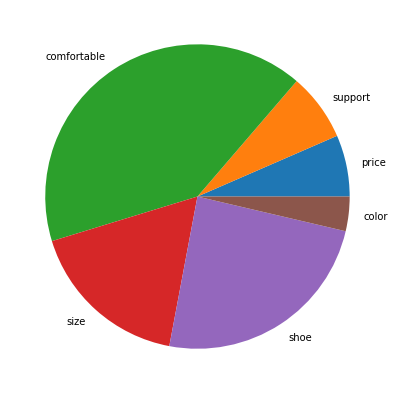

In [167]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = ['price','support','comfortable','size','shoe','color']) 

In [168]:
review=[]
rating=[]
sentiment=[]

In [169]:
size_comfort_list={'size': 'comfortable'}

for k,y in size_comfort_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if (k in review_analysis['feature_extraction'][i] and y in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
size_comfort_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [170]:
size_comfort_distribution

,feature_extraction,review_rating,Sentiment
0,"[shoe, fine, size, nt, fit, feet, comfortable,...",3.0,Neutral
1,"[probably, half, size, larger, comfortable, fit]",4.0,Positive
2,"[comfortable, fit, true, size]",4.0,Positive
3,"[comfortable, size]",5.0,Positive
4,"[size, fit, beautifully, comfortable]",5.0,Positive
...,...,...,...
142,"[size, half, size, typically, wear, comfortabl...",5.0,Neutral
143,"[fit, perfect, true, size, comfortable, look]",5.0,Positive
144,"[love, comfortable, size, fits, perfectly, cha...",5.0,Positive
145,"[normally, wear, size, comfortable]",5.0,Neutral


In [171]:
size_comfort_distribution['review_rating'].value_counts()

5.0    97
4.0    33
2.0     7
3.0     7
1.0     1
Name: review_rating, dtype: int64

In [172]:
size_comfort_distribution['Sentiment'].value_counts()

Positive    127
Neutral      17
Negative      3
Name: Sentiment, dtype: int64

In [173]:
size_color_list={'size': 'color'}

for k,y in size_color_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if (k in review_analysis['feature_extraction'][i] and y in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
size_color_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [174]:
size_color_distribution['review_rating'].value_counts()

5.0    109
4.0     39
3.0      9
2.0      8
1.0      4
Name: review_rating, dtype: int64

In [175]:
size_color_distribution['Sentiment'].value_counts()

Positive    143
Neutral      19
Negative     10
Name: Sentiment, dtype: int64

In [176]:
size_support_list={'size': 'support'}

for k,y in size_support_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if (k in review_analysis['feature_extraction'][i] and y in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
size_support_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [177]:
size_support_distribution['review_rating'].value_counts()

5.0    114
4.0     43
3.0     13
2.0     10
1.0      5
Name: review_rating, dtype: int64

In [178]:
size_support_distribution['Sentiment'].value_counts()

Positive    153
Neutral      21
Negative     15
Name: Sentiment, dtype: int64

In [179]:
size_comfortable_list={'size': 'comfortable'}

for k,y in size_comfortable_list.items():
    for i in range(len(review_analysis['feature_extraction'])):
        if (k in review_analysis['feature_extraction'][i] and y in review_analysis['feature_extraction'][i]):
            review.append(review_analysis['feature_extraction'][i])
            rating.append(review_analysis['review_rating'][i])
            sentiment.append(review_analysis['Sentiment'][i])
        else:
            continue
size_comfortable_distribution=pd.DataFrame({'feature_extraction':review,'review_rating':rating,'Sentiment':sentiment})

In [180]:
size_comfortable_distribution['review_rating'].value_counts()

5.0    211
4.0     76
3.0     20
2.0     17
1.0      6
Name: review_rating, dtype: int64

In [181]:
size_comfortable_distribution['Sentiment'].value_counts()

Positive    280
Neutral      38
Negative     18
Name: Sentiment, dtype: int64

In [182]:
import seaborn as sns

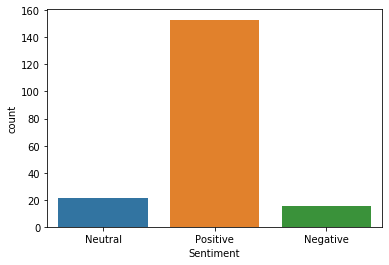

In [183]:
sns.countplot(x=size_support_distribution['Sentiment'])

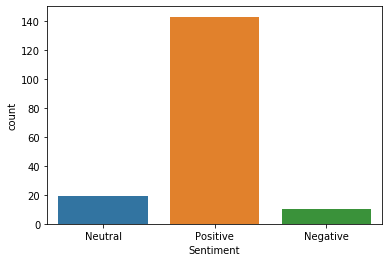

In [184]:
sns.countplot(x=size_color_distribution['Sentiment'])

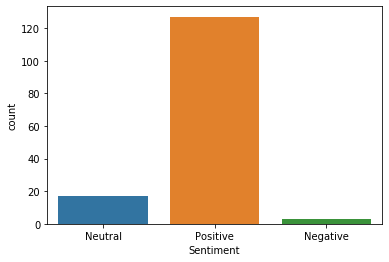

In [185]:
sns.countplot(x=size_comfort_distribution['Sentiment'])

In [94]:
import pickle
pickle.dump(reponse_bow ,open('res_vect.pkl','wb'))

In [187]:
import pickle
pickle.dump(rf,open('rf_model.pkl','wb'))

In [84]:
import pickle
pickle.dump(rf,open('rf_model.pkl','wb'))